# Titanic Disaster
In this project we work on a dataset from the titanic disaster that occured in 1912.We work on this data set to perform some exploratory data analysis, visualisation and a bit of logistic regression. Our Dataframe contains the following columns: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked.

### *The Imports*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Data**

In [70]:
titanic_df = pd.read_csv("train.csv")

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### *Exploratory Data Analysis*

**Null Values in our dataset**

In [6]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


**Data types of all our columns**

In [27]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Basic Information about our dataset**

In [43]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Representation of null values for better understanding**

<AxesSubplot:>

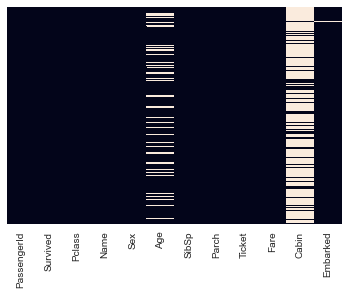

In [53]:
sns.heatmap(titanic_df.isnull(),yticklabels= False,cbar=False)

**Survivors in our dataset**

<AxesSubplot:xlabel='Survived', ylabel='count'>

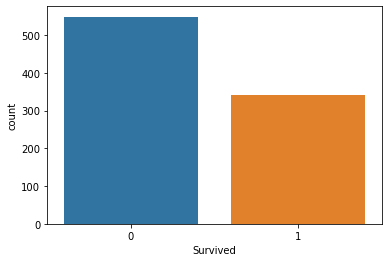

In [10]:
sns.countplot(x='Survived',data=titanic_df)

**How many males and female survivors and deceased are in our dataset** 

<AxesSubplot:xlabel='Survived', ylabel='count'>

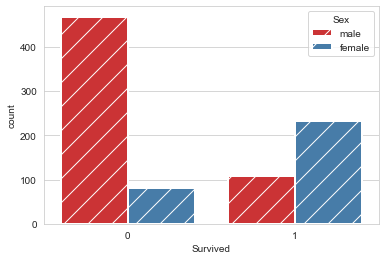

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_df,hue='Sex',palette='Set1',lw=2,ec='white',hatch='/')

**What is the relationship between deceased and survivors with Pclass in our dataset**

<AxesSubplot:xlabel='Survived', ylabel='count'>

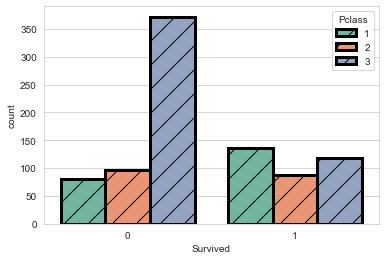

In [25]:
sns.countplot(x='Survived',data=titanic_df,hue='Pclass',palette='Set2',hatch='/',lw=3,ec='black')

**Different Ages of people in our dataset**

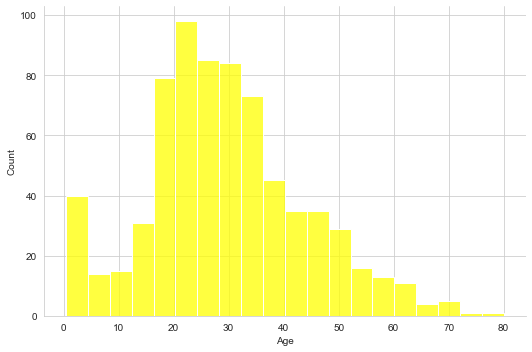

In [42]:
sns.displot(titanic_df['Age'].dropna(),aspect = 1.5,color='Yellow')

**People with Siblings or Spouse on board**

<AxesSubplot:xlabel='SibSp', ylabel='count'>

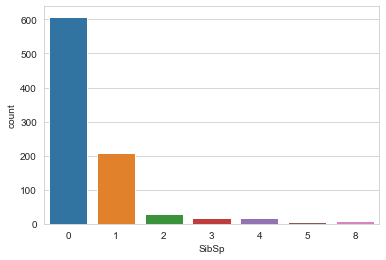

In [45]:
sns.countplot(data=titanic_df,x='SibSp')

#### Plot a distribution chart for fare

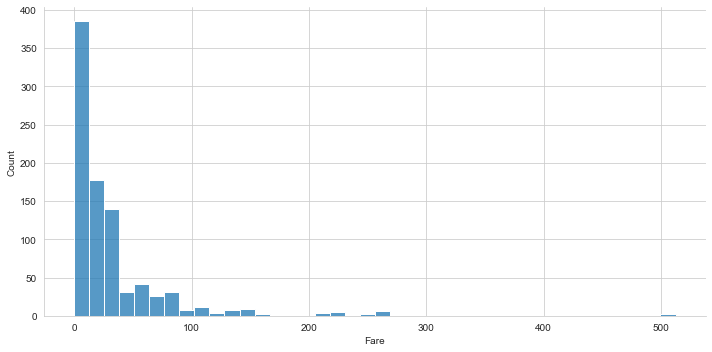

In [52]:
sns.displot(x='Fare',data=titanic_df,bins=40,aspect=2)

### *Data Cleaning*

**Inserting Values for Null Columns**

In [71]:
def age_correction(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 24
    else :
     return Age

In [72]:
titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(age_correction,axis=1)

**Heatmap after data cleaning**

<AxesSubplot:>

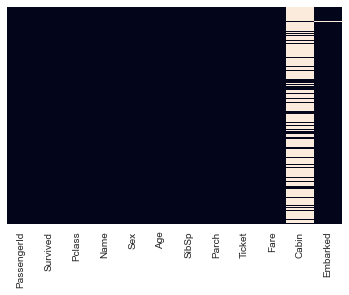

In [73]:
sns.heatmap(titanic_df.isnull(),yticklabels= False,cbar=False)

**Dropping the Cabin column**

In [77]:
titanic_df.drop('Cabin',inplace=True,axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Since we only have a few more NaN values we can drop them**

In [79]:
titanic_df.dropna(inplace=True)

**Dataset After Cleaning**

<AxesSubplot:>

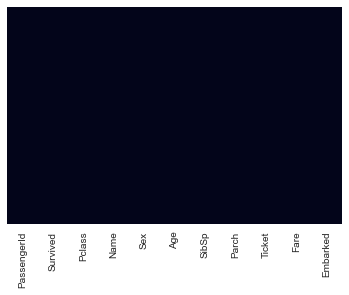

In [81]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False)

**Make a Dummy Column for the columns "Sex" and "Embarked"**

In [95]:
titanic_df['sex'] = pd.get_dummies(titanic_df['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_df['Embarked'])
titanic_df = pd.concat([titanic_df, embark],axis=1) 

In [99]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,0,1


**Dropping the columns we aren't going to use**

In [100]:
titanic_df.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [104]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


### *Machine Learning*

**Splitting the data to X and y**

In [105]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sex', 'C', 'Q',
       'S'],
      dtype='object')

In [108]:
X = titanic_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sex', 'C', 'Q', 'S']]
y = titanic_df['Survived']

#### splitting the data into train and test

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

### *Predictions and Evaluation*

#### Import Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression

**Create an instance of your logistic regression model**

In [116]:
logmodel = LogisticRegression(max_iter=1000)

**Training the model**

In [117]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

**Call some predictions of out X_test dataset**

In [118]:
predictions = logmodel.predict(X_test)

**Use Classification Report on the dataset**

In [119]:
from sklearn.metrics import classification_report

In [121]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

